In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

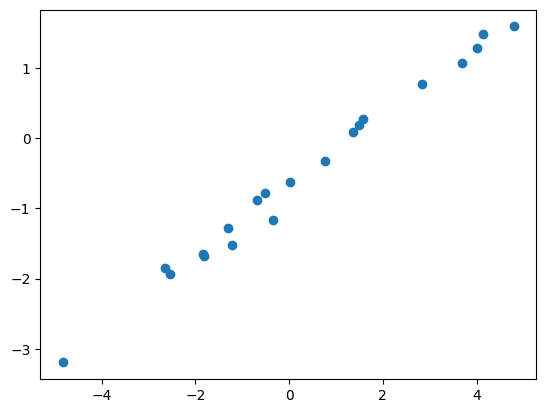

In [2]:

# Generate 20 data points
N = 20
# Random data on x-axis
X = np.random.rand(N) * 10 - 5
Y = 0.5 * X - 1 + 0.5*np.random.rand(N)


plt.scatter(X,Y)

In [3]:

# Create the linear regression model
model = nn.Linear(1, 1)
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [4]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [5]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 0.7487
Epoch 2/30, Loss: 0.3931
Epoch 3/30, Loss: 0.2981
Epoch 4/30, Loss: 0.2428
Epoch 5/30, Loss: 0.2003
Epoch 6/30, Loss: 0.1659
Epoch 7/30, Loss: 0.1380
Epoch 8/30, Loss: 0.1153
Epoch 9/30, Loss: 0.0968
Epoch 10/30, Loss: 0.0818
Epoch 11/30, Loss: 0.0695
Epoch 12/30, Loss: 0.0595
Epoch 13/30, Loss: 0.0514
Epoch 14/30, Loss: 0.0448
Epoch 15/30, Loss: 0.0395
Epoch 16/30, Loss: 0.0351
Epoch 17/30, Loss: 0.0315
Epoch 18/30, Loss: 0.0286
Epoch 19/30, Loss: 0.0263
Epoch 20/30, Loss: 0.0244
Epoch 21/30, Loss: 0.0228
Epoch 22/30, Loss: 0.0215
Epoch 23/30, Loss: 0.0205
Epoch 24/30, Loss: 0.0196
Epoch 25/30, Loss: 0.0190
Epoch 26/30, Loss: 0.0184
Epoch 27/30, Loss: 0.0180
Epoch 28/30, Loss: 0.0176
Epoch 29/30, Loss: 0.0173
Epoch 30/30, Loss: 0.0170


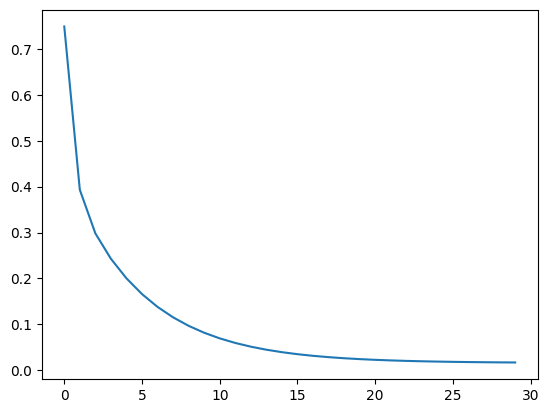

In [6]:
# Plot the loss per iteration
plt.plot(losses);

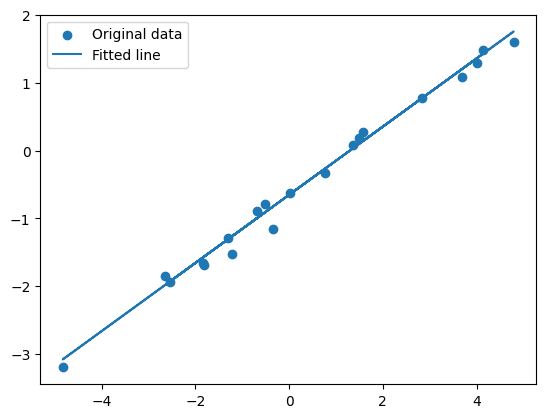

In [7]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [8]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
m = model.weight.data.numpy()
b = model.bias.data.numpy()
print(m, b)

[[0.50226]] [-0.65205646]
